In [1]:
import seaborn as sns;sns.set()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir(r'C:\Users\dell\PycharmProjects\MachineLearning\Pandas\datasets')

In [2]:
titanic = pd.read_csv('./titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
tips = pd.read_csv('./tips.csv', index_col = 0)
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In most of the situations, we deal with estimations of the whole distribution of the data. But when it comes to central tendency estimation, we need a specific way to summarize the distribution. Mean and median are the very often used techniques to estimate the central tendency of the distribution.

In all the plots that we learnt in the above section, we made the visualization of the whole distribution. Now, let us discuss regarding the plots with which we can estimate the central tendency of the distribution.

# sns.barplot

```python
sns.barplot(
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    estimator=<function mean at 0x000001528DEEBBF8>,
    ci=95,
    n_boot=1000,
    units=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    errcolor='.26',
    errwidth=None,
    capsize=None,
    dodge=True,
    ax=None,
    **kwargs,
)
```

In [4]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x000001528DEEBBF8>, ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
    Show point estimates and confidence intervals as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    variables.
    


Text(0, 0.5, 'Average Survival Rate')

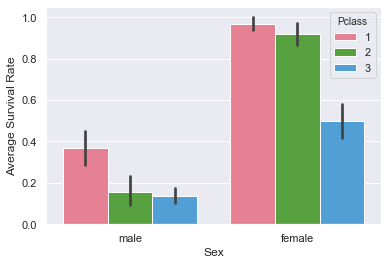

In [4]:
fig, ax = plt.subplots()

sns.barplot(x = 'Sex', y = 'Survived', data = titanic, hue = 'Pclass', palette = 'husl', ax = ax)

ax.set_ylabel('Average Survival Rate')

Text(0, 0.5, 'Median total bill ($)')

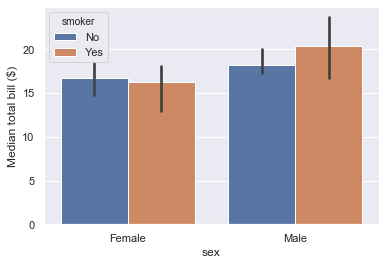

In [5]:
#use median to measure central tendency (estimator = np.median)
fig, ax = plt.subplots()
sns.barplot(x = 'sex', y = 'total_bill', data = tips, hue = 'smoker', estimator = np.median, ax = ax)

ax.set_ylabel('Median total bill ($)')

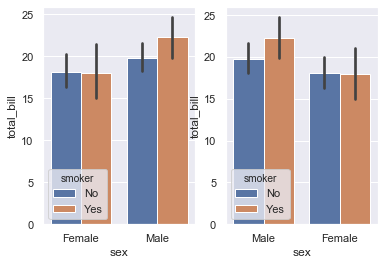

In [12]:
#order
fig, axes = plt.subplots(1,2)
sns.barplot(x = 'sex', y = 'total_bill', data = tips, hue = 'smoker', ax = axes[0], order = ('Female', 'Male'))
sns.barplot(x = 'sex', y = 'total_bill', data = tips, hue = 'smoker', ax = axes[1], order = ('Male', 'Female'))

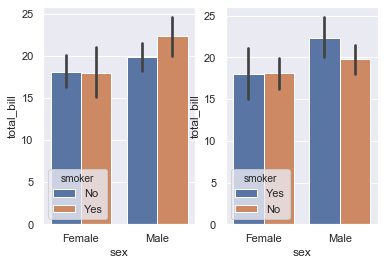

In [14]:
#hue_order

fig, axes = plt.subplots(1,2)
sns.barplot(x = 'sex', y = 'total_bill', data = tips, hue = 'smoker', ax = axes[0], hue_order = ('No', 'Yes'))
sns.barplot(x = 'sex', y = 'total_bill', data = tips, hue = 'smoker', ax = axes[1], hue_order = ('Yes', 'No'))

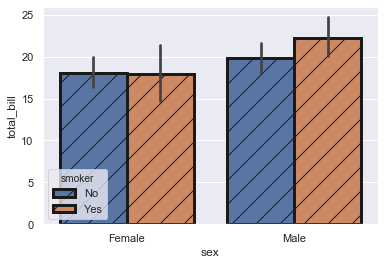

In [6]:
#customize bar
sns.barplot(x = 'sex', y = 'total_bill', data = tips, hue = 'smoker', linewidth = 3, edgecolor = 'k', hatch = '/')

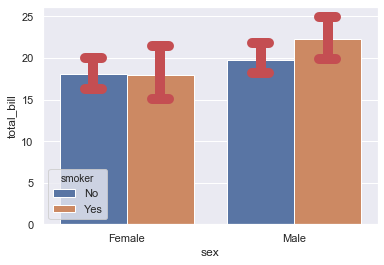

In [29]:
#customizer error
#color: red (errcolor = 'r')
#capsize = 0.1
#errorwidth = 10 (errwidth = 10)
sns.barplot(x = 'sex', y = 'total_bill', data = tips, hue = 'smoker', errcolor = 'r', capsize = 0.1, errwidth = 10)

# sns.countplot

show the no of observations in each category rather than computing a statistic for a second variable

```python
sns.countplot(
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True,
    ax=None,
    **kwargs,
)
```

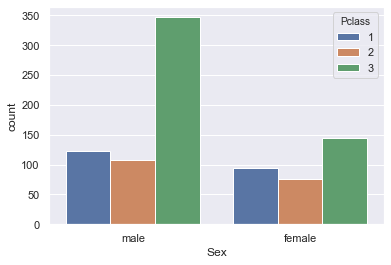

In [38]:
#The number of male and female passengers in each Pclass
sns.countplot(x = 'Sex', data = titanic, hue = 'Pclass')

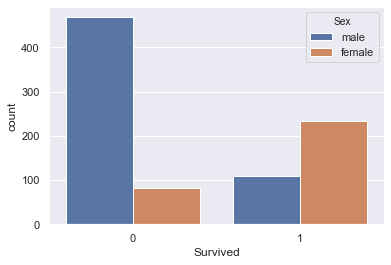

In [37]:
#the number of surviors, for each gender
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic)

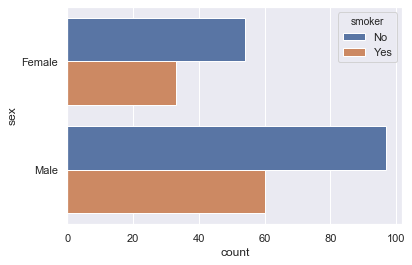

In [40]:
#passing to y to plot horizontally

#the number of smoker, not smaker for each gender
sns.countplot(y = 'sex', hue = 'smoker', data = tips)

Text(0, 0.5, 'Pclass')

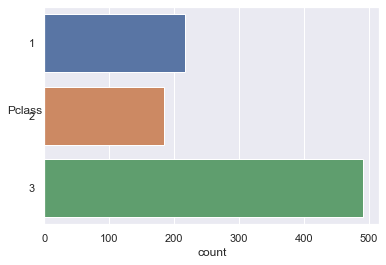

In [43]:
#count the number of passengers in each Pclass, plot horizontally
ax = sns.countplot(y = 'Pclass', data = titanic)

# sns.pointplot

```python
sns.pointplot(
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    estimator=<function mean at 0x000001528DEEBBF8>,
    ci=95,
    n_boot=1000,
    units=None,
    markers='o',
    linestyles='-',
    dodge=False,
    join=True,
    scale=1,
    orient=None,
    color=None,
    palette=None,
    errwidth=None,
    capsize=None,
    ax=None,
    **kwargs,
)
```

In [45]:
help(sns.pointplot)

Help on function pointplot in module seaborn.categorical:

pointplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x000001528DEEBBF8>, ci=95, n_boot=1000, units=None, markers='o', linestyles='-', dodge=False, join=True, scale=1, orient=None, color=None, palette=None, errwidth=None, capsize=None, ax=None, **kwargs)
    Show point estimates and confidence intervals using scatter plot glyphs.
    
    A point plot represents an estimate of central tendency for a numeric
    variable by the position of scatter plot points and provides some
    indication of the uncertainty around that estimate using error bars.
    
    Point plots can be more useful than bar plots for focusing comparisons
    between different levels of one or more categorical variables. They are
    particularly adept at showing interactions: how the relationship between
    levels of one categorical variable changes across levels of a second
    categorical variable. The l

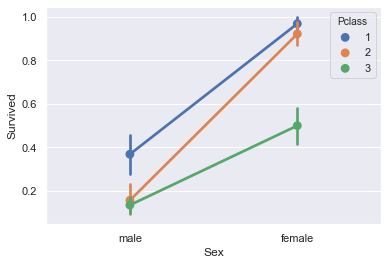

In [46]:
sns.pointplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = titanic)

**comment**: Pclass 1 has a high chance of surviving